#### Data preparation

	•	Null hypothesis (H₀): There is no significant difference in the average prices between sneakers released in peak months (December) and those released in off-peak months.
	•	Alternative hypothesis (H₁): There is a significant difference in the average prices between sneakers released in peak months and off-peak months.

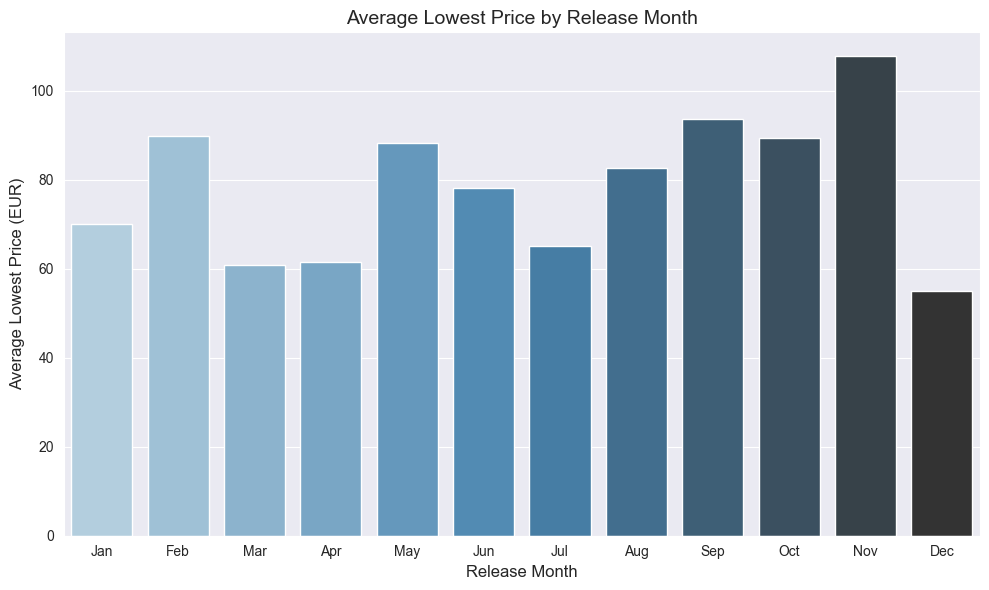

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../more_data.csv')
# Group data by release_month and calculate the average lowest_price_eur
month_avg_price = df.groupby('release_month')['lowest_price_eur'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot a bar chart of the average lowest price by release month
sns.barplot(data=month_avg_price, x='release_month', y='lowest_price_eur', palette='Blues_d', hue = 'release_month', legend=False)

# Add title and labels
plt.title('Average Lowest Price by Release Month', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Average Lowest Price (EUR)', fontsize=12)
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis

In [8]:
from scipy import stats

# Define peak and off-peak months
peak_months = [12]  # December as a peak month
off_peak_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # All other months as off-peak months

# Create two groups: Peak months and Off-peak months
peak_prices = df[df['release_month'].isin(peak_months)]['lowest_price_eur']
off_peak_prices = df[df['release_month'].isin(off_peak_months)]['lowest_price_eur']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(peak_prices, off_peak_prices)

# Print the results of the t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -5.571564689230352
P-value: 2.926554152783113e-08


Reject null accept alternative hypothesis

In [9]:
# Import necessary libraries for machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Encode release_month as cyclical (sin/cos encoding)
df['release_month_sin'] = np.sin(2 * np.pi * df['release_month'] / 12)
df['release_month_cos'] = np.cos(2 * np.pi * df['release_month'] / 12)

# Define features (use release_month_sin and release_month_cos as features)
X = df[['release_month_sin', 'release_month_cos']]
y = df['lowest_price_eur']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models (Random Forest and XGBoost)
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print the RMSE for each model
    print(f"{name} RMSE: {rmse}")

Random Forest RMSE: 39.341498196464514
XGBoost RMSE: 39.32783640335922
